## Práctica 2: Ecuaciones no lineales.




1. Bisección
2. Secante
3. Regula 
4. Newton Raphson
5. Punto fijo

# Método de bisección, Newton y secante.


### Bisección


1. Implementar un programa que reciba como input una función $f$, dos números $a, b$, un número de iteraciones $n$ y aplique el método de bisección para aproximar una raíz de $f$ en el intervalo $[a, b]$, devolviendo la última iteración.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def bisect_N(f, a, b, N):
    """
    This function approximates the root of f using bisection method
    
    parameters
    ----------
    f : function object
    a : float. left limit of the interval
    b : float. right limit of the interval
    tol: float. tolerance of the size of the subinterval
    N : int. number of iterations to find the root
    
    returns
    --------
    p : float. Root of f
    
    """
    i = 1
    fa = f(a)
    
    while i <= N:
        
        p = a + (b-a)/2
        fp = f(p)
               
        if fp == 0:
            return i,p
            break
        
        i = i + 1
        
        if fa*fp > 0 :
            a = p
            fa = fp
        else: 
            b = p
    return p
    #if i > N :
        #print('method failed after N =  ' + str(N) + ' iterations')

In [4]:
# ejemplo facil
f = lambda x: x**2 - 1
N = 60
a = 0
b = 3

bisect_N(f,a, b,  N)

(53, 1.0)

2. Modificar el programa del ejercio anterior de manera que en vez de una cantidad de iteraciones $n$, reciba una tolerancia tol de manera que el programa frene cuando $\left|b_{n}-a_{n}\right|<t o l$.


In [5]:
def bisect(f, a, b, tol):
    """
    This function approximates the root of f using bisection method
    
    parameters
    ----------
    f : function object
    a : float. left limit of the interval
    b : float. right limit of the interval
    tol: float. tolerance of the size of the subinterval
    N : int. number of iterations to find the root
    
    returns
    --------
    p : float. Root of f
    
    """
    i = 1
    fa = f(a)
    
    while (b-a)/2 > tol:
        
        p = a + (b-a)/2
        fp = f(p)
               
        if fp == 0:
            return i,p
            break
        
        i = i + 1
        
        if fa*fp > 0 :
            a = p
            fa = fp
        else: 
            b = p
    return i, p
    #if i > N :
        #print('method failed after N =  ' + str(N) + ' iterations')

In [6]:
# ejemplo facil
f = lambda x: x**2 - 1
a = 0
b = 3
tol = 1e-4

bisect(f,a, b, tol)

(15, 0.99993896484375)

3. Determinar una función $f$ y números reales a y $b$ para obtener un valor aproximado de $\sqrt[3]{5}$ usando el método de bisección. ¿Cuántos pasos son necesarios para asegurar que el error es menor que $10^{-10}$ ? Hacer un programa para hallar el valor de dicha aproximación.


La función es: $f(x)=x^3-5$ y buscamos por el método de bisección la solución de $f(x)=0$ en el intervalo $[1,2]$ pues dado que $f$ cambia de signo en dicho intervalo, por TVI $f$ tiene al menos una raís en $[1,2]$. 

Por otra parte $f'(x) = 3x^2\geq0$ para todo $x\in \mathbb{R}$, luego $f$ es creciente, y lo es estrictamente en $[1,2]$ luego la raíz es única.

In [7]:
f = lambda x: x**3 -5
a = 1
b = 2
tol = 1e-10

print("usando nuestra funcion : ")
print(bisect(f, a, b, tol) )
print("usando python: " ,5**(1/3))

usando nuestra funcion : 
(34, 1.7099759465781972)
usando python:  1.7099759466766968


4. Elegir un intervalo apropiado y utilizar el método de bisección para calcular una raíz de la ecuación:
$$
x+0.5=\tan (x)
$$

El intervalo que elegimos es $[0,1]$ pues $f(0) = -1/2$ y $f(1)=0.057$. La solución hallada es única en el intervalo $[-\pi/2,\pi/2]$, pero por la periodicidad de $\tan(x)$ es probable que tenga infinitas raíces.

In [8]:
f = lambda x: np.sin(x)/np.cos(x) - x - 0.5
a = 0
b = 1
tol = 1e-5 

bisect(f, a, b, tol)

(17, 0.9750213623046875)

 Ejercicio 5:
hallar una aproximacion de $^3\sqrt{2}$. 

In [9]:
f = lambda x : x**3 - 2
a = 1
b = 2
tol = 1e-5
N = 20
print('with bisect function we obtain: ', bisect(f, a, b, tol))
print('the value computed with python is ', 2**(1/3))

with bisect function we obtain:  (17, 1.2599334716796875)
the value computed with python is  1.2599210498948732


cuantos pasos para garantizar que el error sea menor que $10^{-5}$?

el error en este metodo satisfce que 
$$
|p_n -p| \leq \frac{b-a}{2^n}
$$
busco $n$ tal que $\frac{2-1}{2^n}\leq 10^{-5}$:

$$
\log(2)*n \geq \log(10^{5})
$$

entonces $n\geq \frac{5}{\log_{10}(2)} \approx 16.609640474436812$

In [10]:
## other example:
f = lambda x : x**3 + 4*x**2 -10
a = 1
b = 2
tol = 1e-6
N = 20
print('real value is: 1.365234375')
bisect(f, a, b, tol)

real value is: 1.365234375


(20, 1.3652286529541016)

### Newton Raphson:

In [11]:
def NR(f,fprime, p0, tol, N, Points = False):
    """
    this function computes an approximate solution of f(x)=0 using Newton-Raphson method.
    
    Parameters
    ----------
    f: function object. 
    fprime : function object.
    p0 : float. Initial guess (it has to be in a neighborhood of the true solution within some  delta)
    tol : float. Number for the stopping criteria. |p-p0|<tol, or |pn - p_n-1|<tol
    N : Int. Max number of iterations before the program stops
    
    Return
    --------
    i: int. The number of iteration at the achieved tolerance
    p : float. The approximate solution
    
    """
    
    i = 1
    points = [p0]
    
    while i <= N:
        p = p0 - f(p0)/fprime(p0)
        points.append(p)
        if abs(p-p0) < tol :
            if Points == False:
              return i, p
              break
            else:
              return i, p, points
              break

        
        i = i + 1
        p0 = p
    
    if i > N:
        print('method failed at N = ' + str(N) + 'iterations')


5. Dada $f(x)=\frac{1}{4} e^{2 x}-1$ mostrar que $f$ tiene una única raíz real y dicha raíz está en el intervalo $[0,1]$. Veamos cuantas iteraciones le toma al método.

In [12]:
import random
random.seed(19060386)

f = lambda x: 0.25*np.exp(2*x) - 1
fprime = lambda x: 0.5*np.exp(2*x)
p0 = random.random() # random number from (0,1)
p1 = random.uniform(-3,100)
print(p0)
tol = 1e-6
N = 30

nr =NR(f, fprime, p0, tol, N)

print('with Newton we obtain p = ',nr[1], " in " + str(nr[0]), " iterations")
print(" The root is ln(4)/2 = ", np.log(4)/2)

0.14643186785129492
with Newton we obtain p =  0.6931471805599757  in 6  iterations
 The root is ln(4)/2 =  0.6931471805599453


6. Sea $f(x)=e^{x^{2}+x+1}-e^{x^{3}}-2$. Sabiendo que $f^{\prime \prime}(x)>0$ para $x \in[0,1 / 2]$, determinar un intervalo $I \subset[0,1 / 2]$ para el cual se puede asegurar que Newton-Raphson converge a una solución de la ecuación $f(x)=0$ para todo $x_{0} \in I$. ¿Cuántos pasos son necesarios para asegurar que el error cometido con dicha aproximación es menor a $10^{-10}$ ?

In [13]:
f = lambda x: np.exp(x**2 +x + 1) - np.exp(x**3) -2
fprime = lambda x: (2*x + 1)*np.exp(x**2 + x + 1) - 3*x**2*np.exp(x**3)
tol = 1e-10
N = 100

P0 = np.random.uniform(0,0.18, size = 10) 

for po in P0:
  print(NR(f, fprime, po, tol, N))

(5, 0.09064422963927309)
(4, 0.09064422963927288)
(4, 0.09064422963927313)
(3, 0.09064422963927309)
(5, 0.09064422963927296)
(4, 0.09064422963927309)
(5, 0.09064422963927317)
(4, 0.09064422963927307)
(5, 0.09064422963927316)
(5, 0.09064422963927311)


8. Considerar la ecuación $\tan (x)-\frac{1}{x}=0$ en el intervalo $[0.5,1]$. a) Determinar un intervalo $I \subset[0.5,1]$ donde Newton- Raphson converge a la solución. (Ayudarse de los gráficos de $f^{\prime}$ y $f^{\prime \prime}$ para hallar las cotas de la convergencia).

b) Para el intervalo hallado en el ítem anterior determinar el número de pasos necesarios para asegurar que el error cometido con Newton-Raphson es menor que $10^{-5}$. Comparar con la cantidad de pasos necesarios para obtener la misma cota del error con el método de bisección.

c) Usando el programa del ejercicio anterior, hallar una aproximación para la solución de la ecuación.


In [14]:
f = lambda x: np.sin(x)/np.cos(x) - 1/x
fprime = lambda x: 1/(np.cos(x))**2 + 1/(x**2)
tol = 1e-5
N = 100
P0 = np.random.uniform(0.5,1, size = 10) 

for po in P0:
  print(NR(f, fprime, po, tol, N))

print("Con biseccion: ", bisect(f, 0.5, 1, tol))




(3, 0.8603335890196684)
(3, 0.8603335890340482)
(3, 0.8603335890193797)
(4, 0.8603335890193798)
(4, 0.8603335890193797)
(3, 0.8603335890374104)
(4, 0.8603335890193797)
(3, 0.86033358901938)
(3, 0.860333589019382)
(4, 0.8603335890193815)
Con biseccion:  (16, 0.8603363037109375)


In [ ]:
p0 =  random.random()
i, p, points = NR(f, fprime, p0, tol, N, Points = True)
print("la sucesion de puntos arrancando en ", p0, " es ")
print("--------------------------------------------------")
print(points)

la sucesion de puntos arrancando en  0.02956607925976762  es 
--------------------------------------------------
[0.02956607925976762, 0.059080483035585295, 0.1177490060216774, 0.23224812878457585, 0.4399110157646019, 0.722042844853037, 0.8585637475730543, 0.8603345562420234, 0.8603335890196735]


In [ ]:
# cantidad de pasos para un error especificado:
import math

error = 1e-5
eps = 0.1
M =10
delta = 2
l = M*eps/(2*delta)
n = (math.log10(error) - math.log10(eps))/math.log10(l)

print(n)

6.643856189774724


### Secant method:

9. a) Implementar un programa que reciba como input una función $f$ y dos puntos $x_{0}$ y $x_{1}$ y aplique el método de la secante para buscar una raíz de $f$.

In [ ]:
def secant(f, p0, p1, tol, N):
    """
    this function computes an approximate solution of f(x)=0 using Secant method.
    
    Parameters
    ----------
    f: function object. 
    p0, p1 : float. Initial guesses (it has to be in a neighborhood of the true solution within some  delta)
    tol : float. Number for the stopping criteria. |p-p0|<tol, or |pn - p_n-1|<tol
    N : Int. Max number of iterations before the program stops
    
    Return
    --------
    i: int. The number of iteration at the achieved tolerance
    p : float. The approximate solution
    
    """
    
    i = 2
    q0, q1 = f(p0), f(p1)
    
    while i <= N:
        p = p1 - (q1*(p1 - p0))/(q1 - q0)
        
        if abs(p-p1) < tol :
            return i, p
            break
        
        i = i + 1
        p0 = p1
        p1 = p
        q0 = q1
        q1 = f(p)
    
    if i > N:
        print('method failed at N = ' + str(N) + 'iterations')



b) Para la función $f(x)=x^{2}-5$ comparar los resultados obtenidos con el método de la secante y el de Newton-Raphson. Comparar los resultados obtenidos en cada paso.


In [ ]:
f = lambda x : x**2 - 5
fprime = lambda x : 2*x
tol = 1e-6
N = 30
p0 = 0
p1 = 3
print('with secant we obtain p = ', secant(f, p0, p1, tol, N), '***** slower than Newton-Raphson')
print('---------------------------------------------------------------------')
print('with Newton Raphson we obtain p = ', NR(f, fprime, p1, tol, N)[0:2], ' ********WOW!!!!!')
print('---------------------------------------------------------------------')
print('with bisect function we obtain: ', bisect(f, p0, p1, tol))
print('---------------------------------------------------------------------')
print('the value computed with python is ', 5**(1/2))

with secant we obtain p =  (7, 2.2360679775604853) ***** slower than Newton-Raphson
---------------------------------------------------------------------
with Newton Raphson we obtain p =  (4, 2.236067977499978)  ********WOW!!!!!
---------------------------------------------------------------------
with bisect function we obtain:  (22, 2.2360682487487793)
---------------------------------------------------------------------
the value computed with python is  2.23606797749979


Calcular una solución aproximada de las siguientes ecuaciones

a) $e^{-x}+x^{2}-3 \operatorname{sen}(x)=0$

b) $e^{|x|}=\arctan (x)+2$,

c) $x^{15}-2=0$,

utilizando los métodos anteriores. Comparar cómo se comportan los errores y decidir cuál tiene la convergencia más rápida.


In [ ]:
# a)

f = lambda x: np.exp(-x) + x**2 -3*np.sin(x)
fprime = lambda x: -np.exp(-x) +2*x -3*np.cos(x)
tol = 1e-10
N = 30
p0 = 0
p1 = 1

print('with secant we obtain p = ', secant(f, p0, p1, tol, N))
print('---------------------------------------------------------------------')
print('with Newton Raphson we obtain p = ', NR(f, fprime, p0, tol, N)[0:2], ' ********WOW!!!!!')
print('---------------------------------------------------------------------')
print('with bisect function we obtain: ', bisect(f, p0, p1, tol))


with secant we obtain p =  (9, 0.2816634752793798)
---------------------------------------------------------------------
with Newton Raphson we obtain p =  (5, 0.2816634752793798)  ********WOW!!!!!
---------------------------------------------------------------------
with bisect function we obtain:  (34, 0.28166347520891577)


## Ploting the errors for each iteration:

In this part we don't use the stopping criteria since we want to compute the error at each iteration for each method!

In [ ]:
def bisect1(f, a, b, N):
    i = 1
    fa = f(a)
    
    while i <= N:
        
        p = a + (b-a)/2
        fp = f(p)        
        i = i + 1
        
        if fa*fp > 0 :
            a = p
            fa = fp
        else: 
            b = p
    return p

def NR1(f,fprime, p0, N):
    i = 1
    
    while i <= N:
        p = p0 - f(p0)/fprime(p0)
        i = i + 1
        p0 = p
    return p

def secant1(f, p0, p1, N):
    i = 1
    q0, q1 = f(p0), f(p1)
    
    while i <= N:
        p = p1 - q1*(p1 - p0)/(q1 - q0)
        i = i + 1
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    return p

In [ ]:
f = lambda x: np.exp(-x) + x**2 -3*np.sin(x)
fprime = lambda x: -np.exp(-x) +2*x -3*np.cos(x)
tol = 1e-10
N = 100
p0 = 0
p1 = 1

x = NR(f, fprime, p0, tol, N)[1]
print(x)

0.2816634752793798


<ipython-input-21-9aafa7c8d2b6>:25: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(range(1,20), np.log10(e_NR), marker = '*',color = 'blue', label = 'NR')


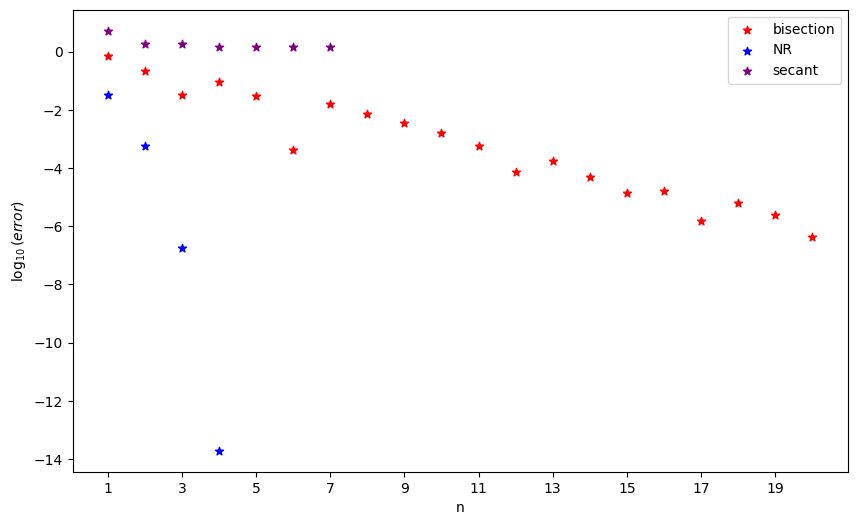

In [ ]:
# plotting errors
a, b = 0, 2
f = lambda x: np.exp(-x) + x**2 -3*np.sin(x)
fprime = lambda x: -np.exp(-x) +2*x -3*np.cos(x)
tol = 1e-10
N = 100
p0 = 0
p1 = 2

e_b = np.zeros(20)
for n in range(1,21):
    e_b[n-1] = np.abs(x - bisect1(f, a, b, n))

e_NR = np.zeros(19)
for n in range(1,20):
    e_NR[n-1] = np.abs(x - NR1(f, fprime, p0, n))

e_sec = np.zeros(7)
for n in range(1,8):
    e_sec[n-1] = np.abs(x - secant1(f, p0, p1, n))
 

plt.figure(figsize = (10,6), dpi = 100)
plt.scatter(range(1,21), np.log10(e_b), marker = '*',color = 'red', label = 'bisection')
plt.scatter(range(1,20), np.log10(e_NR), marker = '*',color = 'blue', label = 'NR')
plt.scatter(range(1,8), np.log10(e_sec), marker = '*',color = 'purple', label = 'secant')
plt.ylabel('$\log_{10}(error)$')
plt.xlabel('n')
plt.xticks(range(1,21,2))
plt.legend()
plt.show()





## Punto fijo

*italicized text*

12. Estudiar numéricamente las iteraciones de $g(x)=\lambda x(1-x)$ para $x_{0}=0.3$, en los casos $\lambda=0.9,2.5,3.2,3.56,3.9$.

In [ ]:
g = lambda x, l: l*x*(1-x)
n = 10
L = [0.9, 2.5, 3.2, 3.56, 3.9]
x0 = 0.3
X = np.zeros((len(L), n+1))
X[:, 0] = x0

for (i, l) in enumerate(L):
  x_old = x0
  for j in range(1, n+1):
    x = g(x_old, L[i])
    X[i,j] = x
    x_old = x

print(X)  

[[0.3        0.189      0.1379511  0.10702853 0.08601608 0.07075559
  0.05917431 0.05010544 0.0428354  0.03690047 0.03198494]
 [0.3        0.525      0.6234375  0.58690796 0.60611752 0.59684768
  0.60155132 0.59921833 0.60038931 0.59980497 0.60009742]
 [0.3        0.672      0.7053312  0.66508511 0.7127901  0.6551052
  0.72301561 0.64084493 0.73652066 0.62098553 0.75316001]
 [0.3        0.7476     0.67175149 0.78498507 0.6008693  0.85377837
  0.44443347 0.87900801 0.37861644 0.83754707 0.48438064]
 [0.3        0.819      0.5781321  0.95119196 0.18106067 0.57828305
  0.95109988 0.1813847  0.57908873 0.95060539 0.18312364]]


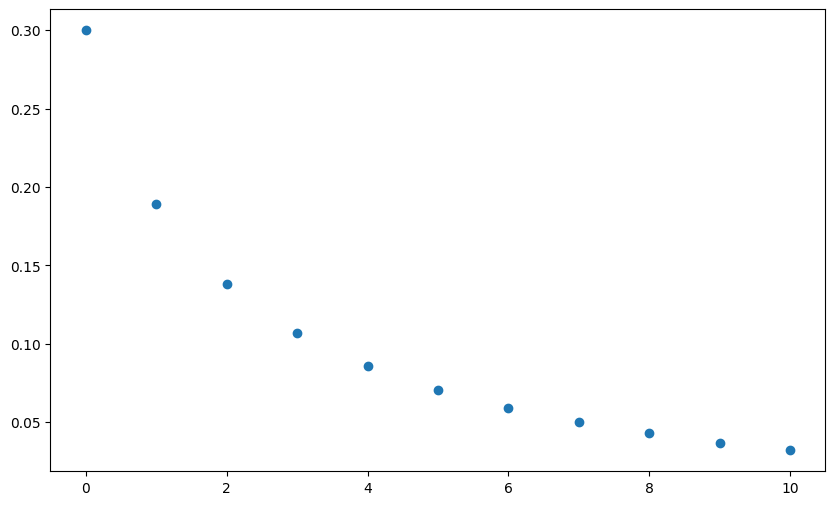

In [ ]:
plt.figure(figsize = (10,6), dpi = 100)
plt.scatter(range(X.shape[1]), X[0,:])

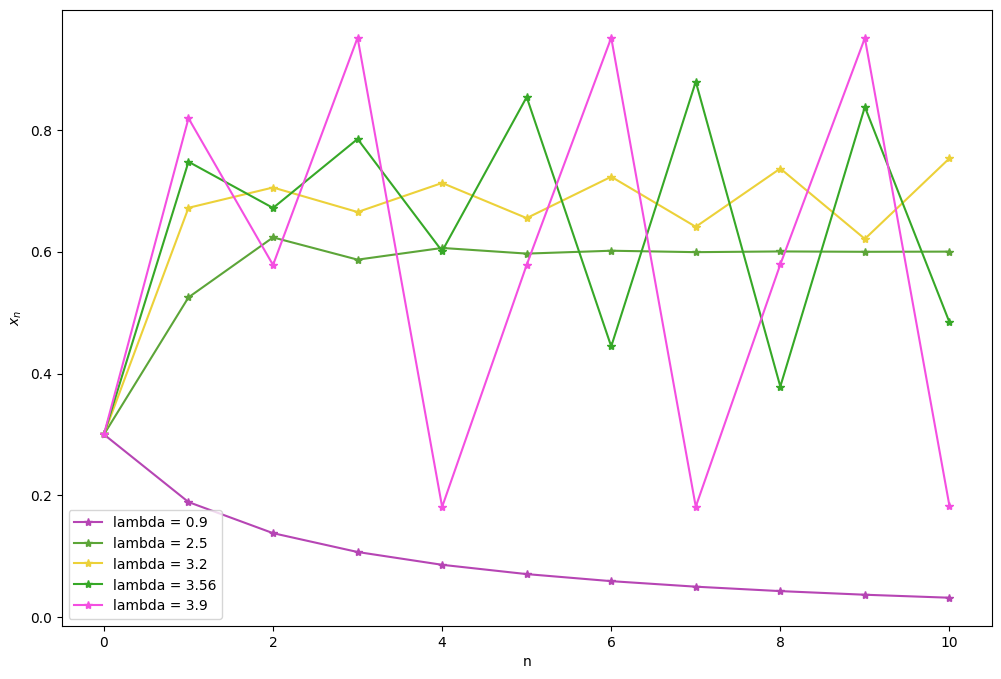

In [ ]:
x = range(X.shape[1])
K = X.shape[0]
from random import randint
colors = []

for k in range(K):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

plt.figure(figsize = (12,8), dpi = 100)

for i in range(K):
  plt.plot(x, X[i,:], marker = '*',color = colors[i], label = 'lambda = ' + str(L[i]))
  plt.ylabel('$x_n$')
  plt.xlabel('n')
  plt.legend()



#### Algoritmo de punto fijo

In [ ]:
def fixed_point(g, x0, tol, N):

  i = 1
  while i<= N:
    x_new = g(x0)

    if np.abs(x_new - x0) < tol:
      return i, x_new
      break
    
    i = i+1
    x0 = x_new
  
  return i, x_new

#### *Ejercicio* 15
El siguiente sistema de ecuaciones representa la dinámica de un sistema transcripcional en donde la proteina inhibe (reprime) su propia producción. La variable $x$ representa la concentración de mARN y la variable $y$ representa la concentración de proteína:

$$
\left\{\begin{array}{l}
\dot{x}=\kappa_{1} f(y)-\gamma_{1} x, \\
\dot{y}=\kappa_{2} x-\gamma_{2} y,
\end{array}\right.
$$

donde $\kappa_{1}, \kappa_{2}>0$ son constantes que representan la tasa de producción y $\gamma_{1}, \gamma_{2}>0$ son constantes

que representan la tasa de degradación. La no linealidad viene dada por la función $f(y)=\frac{\theta^{\alpha}}{\theta^{\alpha}+y^{\alpha}}$, con $\theta>0$. Considerar $\kappa_{1}=2, \kappa_{2}=1, \gamma_{1}=\gamma_{2}=1, \theta=1$ y $\alpha=0.5$. Plantear un método de punto fijo convergente y luego aproximar el estado estacionario del sistema implementando dicho método. Recordar que los estados estacionarios son aquellos en los que $\dot{x}=\dot{y}=0$.


El sistema se transforma en una ecuacion no lineal
$$
\frac{2}{1+\sqrt{x}} = x
$$


*Spoiler Alert*: la solucion es $x=y=1$

In [ ]:
g = lambda x: 2/(1+x**0.5)
I = [0.5, 2]
x0 = np.random.uniform(I[0], I[1])
N = 30
tol = 1e-6
iter, solution = fixed_point(g, x0, tol, N)

print("LA solucion aproximada de estado estacionario es: x = y", solution, " le tomo " + str(iter) + " iteraciones")

LA solucion aproximada de estado estacionario es: x = y 1.000000109932705  le tomo 11 iteraciones


## Newton en dimension mayor a dos 

In [ ]:
from scipy.linalg import *

def Newton(F, DF, P0, tol, N, points = False):
    """
    Newton to compute critical points for f:R^n\to R. Compute zeros of the Df =F
    """
    i = 1
    points = [P0]
    
    while i<=N:
        
        P = P0 - inv(DF(P0[0],P0[1]))@F(P0[0],P0[1])
        points.append(P)
        
        if norm(P-P0) < tol:
            if points == True:
              return i, P, points
            else:
              return i, P
            break
        
        i = i+1
        P0 = P
    
    return P

#### Ejercicio 16

Comenzando con $\left(x_{0}, y_{0}\right)=(1,2)$, utilizar el método de Newton-Raphson para aproximar una solución del sistema

$$
\left\{\begin{aligned}
3 x^{2}+(y-2)^{2} & =4 \\
y & =e^{x}
\end{aligned}\right.
$$

In [ ]:
F = lambda x, y: np.array([3*x**2 + (y-2)**2 - 4, y - np.exp(x)])
DF = lambda x, y: np.array([[6*x, 2*(y-2)],[-np.exp(x), 1]])
P0 = np.array([1,2])
tol = 1e-6
N = 30


i, P = Newton(F, DF, P0, 1e-5, N)

print("Le tomó " + str(i) + " iteraciones para encontrar el punto ", P)

Le tomó 5 iteraciones para encontrar el punto  [1.04613738 2.84663438]


En ese caso se puede hacer un Newton unidimensional pues $y = \exp(x)$ con lo cual se reduce a una ecuacion:

$$
3x^2 +(\exp(x)-2)^2 - 4 =0
$$

In [ ]:
f = lambda x: 3*x**2 + (np.exp(x)-2)**2 - 4
fprime = lambda x: 6*x +2*(np.exp(x)-2)*np.exp(x)
p0 = 1
tol = 1e-6
N = 30
_ , x = NR(f, fprime, p0, tol, N)

print(" como x = " + str(x) + " P = (x, y ) = (x, exp(x)) = ", np.array([x, np.exp(x)]))

 como x = 1.0461373763371598 P = (x, y ) = (x, exp(x)) =  [1.04613738 2.84663438]


Un Ejemplo mas:






In [ ]:
F = lambda x, y: np.array([-2*x*y*np.exp(-x**2) + 2*x + 1, np.exp(-x**2) + 4*y**3])
DF = lambda x, y: np.array([[y*np.exp(-x**2)*(4*x**2 - 2) + 2 , -2*x*np.exp(-x**2)],[-2*x*np.exp(-x**2), 12*y**2]])



---



---



---



---



---



*italicized text*### Ejercicio 5

Aproximar $^{3}\sqrt(2)$ usando bisección en $[1,2]$, NR con $x_0=2$ y secante con $p_0=3,~p_1=2$

<ipython-input-31-41df28fcc6e5>:25: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(range(1,20), np.log10(e_NR), marker = '*',color = 'blue', label = 'NR')


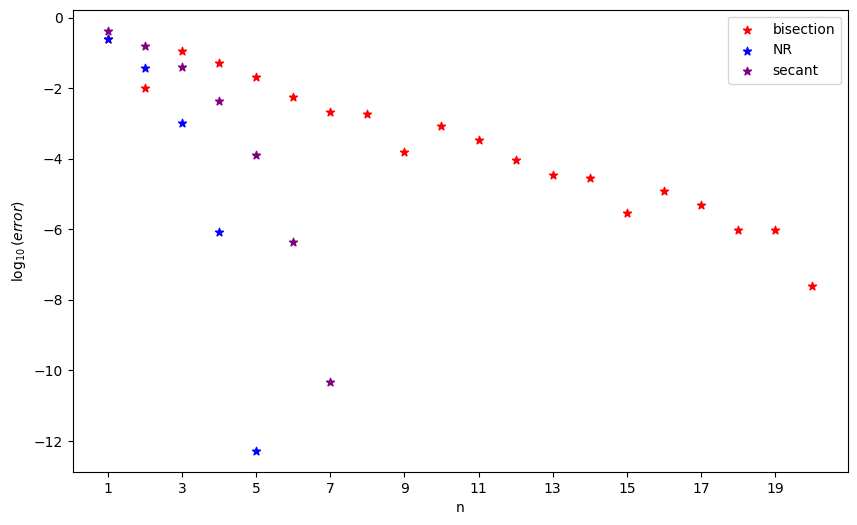

In [ ]:
x = 2**(1/3)
a, b = 1, 2
f = lambda x : x**3 - 2
fprime = lambda x : 3*x**2
tol = 1e-6
N = 30
x0 = 2
p1 = 2
p0 = 3
e_b = np.zeros(20)
for n in range(1,21):
    e_b[n-1] = np.abs(x - bisect1(f, a, b, n))

e_NR = np.zeros(19)
for n in range(1,20):
    e_NR[n-1] = np.abs(x - NR1(f, fprime, x0, n))

e_sec = np.zeros(7)
for n in range(1,8):
    e_sec[n-1] = np.abs(x - secant1(f, p0, p1, n))
 

plt.figure(figsize = (10,6), dpi = 100)
plt.scatter(range(1,21), np.log10(e_b), marker = '*',color = 'red', label = 'bisection')
plt.scatter(range(1,20), np.log10(e_NR), marker = '*',color = 'blue', label = 'NR')
plt.scatter(range(1,8), np.log10(e_sec), marker = '*',color = 'purple', label = 'secant')
plt.ylabel('$\log_{10}(error)$')
plt.xlabel('n')
plt.xticks(range(1,21,2))
plt.legend()

# Otros metodos:



## Regula `Falsi`

In [ ]:
def RegFalsi(f, p0, p1, tol, N):
    """
    this function computes an approximate solution of f(x)=0 using Regula Falsi.
    
    Parameters
    ----------
    f: function object. 
    p0, p1 : float. Initial guesses such that f(p0)f(p1)<0
    tol : float. Number for the stopping criteria. |p-p0|<tol, or |pn - p_n-1|<tol
    N : Int. Max number of iterations before the program stops
    
    Return
    --------
    i: int. The number of iteration at the achieved tolerance
    p : float. The approximate solution
    """
    
    i = 1
    q0 = f(p0)
    q1 = f(p1)
    
    while i <= N:
        
        p = p1 - q1*(p1 - p0)/(q1 - q0)
        if abs(p - p1) < tol :
            return str(i) + ' iteraciones. La solucion es : ', p
            break
        
        i = i + 1
        q = f(p)
        
        # elijo el intervalo
        if q*q1 < 0:
            p0 = p
            q0 = q
        else:
            p1 = p
            q1 = q
    return i, p

#### Ejemplo:

$f(x)=\cos(x) - x$ with $p_0 = 0.5$, $p_1 =\pi/4$

In [ ]:
f = lambda x : np.cos(x) - x
fprime = lambda x : -np.sin(x) -1
p0 = 0.5
p1 = 0.25*np.pi
tol = 1e-6
N = 20
print('con Regula falsi ', RegFalsi(f, p0, p1, tol, N))
print('------------------------------------------------------------------')
print('con Newton : ', NR(f, fprime, p1, tol, N)[0:2])
print('------------------------------------------------------------------')
print('con Secante : ', secant(f, p0, p1, tol, N))
print('------------------------------------------------------------------')
print('con biseccion : ', bisect(f, p0,p1, tol))
print('------------------------------------------------------------------')

con Regula falsi  ('9 iteraciones. La solucion es : ', 0.7390851332151607)
------------------------------------------------------------------
con Newton :  (3, 0.7390851332151611)
------------------------------------------------------------------
con Secante :  (5, 0.7390851332150645)
------------------------------------------------------------------
con biseccion :  (19, 0.7390856310764183)
------------------------------------------------------------------


## ejercicio 6.

$$
f(x) =\frac{x}{1+|x|}
$$

In [ ]:
f = lambda x : x/(1+np.abs(x))
fprime = lambda x: 1/(1+np.abs(x))**2
p0 = 1
tol = 1e-4
N =10000

In [ ]:
NR(f, fprime, p0, tol, N)

method failed at N = 10000iterations


## Ejercicio 9

$$
f(x) = (x+1)\exp(x)-4
$$

* NR converge para todo $x_0>1$

* Que pasa si $x_0=-3$?

In [ ]:
f = lambda x : (x+1)*np.exp(x) - 4
fprime = lambda x : (x+2)*np.exp(x)
p0 = -1.9
N = 1000
tol = 1e-8
NR(f, fprime, p0, tol, N)[0:2]

(285, 0.7990407531718926)

In [ ]:
f(0.5)

-1.5269180939498077

In [ ]:
f(1)

1.4365636569180902

f tiene una raiz en $(0.5,1)$ y como $f' >0$ en $(-2,+\infty)$ la raiz es unica!

## Ejercicio 10:

$$
f(x) = -\exp(-x) +5x
$$

In [ ]:
f = lambda x: -np.exp(-x) +5*x
fprime = lambda x: np.exp(-x) +5
p0 = 1000
tol = 1e-6
N = 100000


In [ ]:
NR(f, fprime, p0, tol, N)

(4, 0.1689159734990999)

Notar que si $f(x)=-\exp(-x) + 5$ no se tiene convergencia para todo dato inicial $x_0$. Se necesita fuertemente que $f'(x) >\delta >0$ para todo $x$. Esta hipotesis si bien no es necesaria desde el punto de vista teorico es necearia desde el punto de vista practico!

In [ ]:
f = lambda x: -np.exp(-x) +5
fprime = lambda x: np.exp(-x) 
p0 = 0
tol = 1e-6
N = 100



In [ ]:
i,p = NR(f, fprime, p0,tol, N)

In [ ]:
p

-1.6094379124341005

## Ejercicio 16.c

$f(x) = 4x^3 - 3x +1$ tiene una raiz doble. Hallarla usando el metodo de Newton y la versión modificada

$$
p_{n+1} = p_n -2\frac{f(p_n)}{f'(p_n)}
$$

In [ ]:
def Newton_multiple_roots(f, fprime, p0, tol, N, m):
    """
    modified version of Newton for roots with multiplicity m
    """
    i = 1
    points = [p0]
    
    while i <= N:
        p = p0 - m*f(p0)/fprime(p0)
        points.append(p)
        if abs(p-p0) < tol :
            return i, p, points
            break
        
        i = i + 1
        p0 = p
    
    

    

In [ ]:
f = lambda x: 4*x**3 - 3*x +1
fprime = lambda x: 12*x**2 - 3
p0 = 25
tol =1e-15
N =10

In [ ]:
pointsN = [p0]
for n in range(1,9): 
    p= NR1(f, fprime, p0, n)
    pointsN.append(p)
len(pointsN)

9

In [ ]:
_, _, pointsNm = Newton_multiple_roots(f, fprime, p0, tol, N, 2)
len(pointsNm)

9

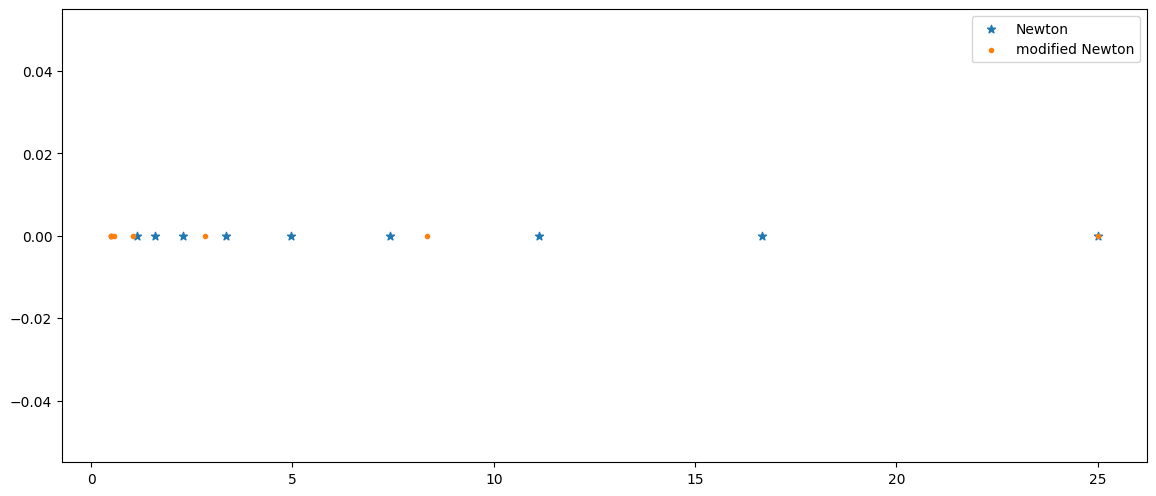

In [ ]:
plt.figure(figsize = (14,6), dpi = 100)
plt.scatter(pointsN, np.zeros(len(pointsN)), marker = '*', label = 'Newton')
plt.scatter(pointsNm, np.zeros(len(pointsNm)), marker = '.', label = 'modified Newton')
plt.legend()

In [ ]:
for i in range(len(pointsN)):
    print('p_' + str(i) + ' de Newton es --> ', pointsN[i])
    print('\n')
    print('p_' + str(i) + ' de Newton modificado es --> ', pointsNm[i])
    print('\n')

p_0 de Newton es -->  25


p_0 de Newton modificado es -->  25


p_1 de Newton es -->  16.673202614379086


p_1 de Newton modificado es -->  8.346405228758169


p_2 de Newton es -->  11.125173452402422


p_2 de Newton modificado es -->  2.8198151649117538


p_3 de Newton es -->  7.431119005251591


p_3 de Newton modificado es -->  1.040345584721491


p_4 de Newton es -->  4.97509360563509


p_4 de Newton modificado es -->  0.5631835162671848


p_5 de Newton es -->  3.34716995028253


p_5 de Newton modificado es -->  0.5012516361370682


p_6 de Newton es -->  2.2747685217721463


p_6 de Newton modificado es -->  0.5000005215448823


p_7 de Newton es -->  1.5765774182707006


p_7 de Newton modificado es -->  0.4999999999732743


p_8 de Newton es -->  1.131311883336387


p_8 de Newton modificado es -->  0.4999999999732743




In [ ]:
P0 = np.array([2,1])

(8,
 array([-0.32296206, -0.60843434]),
 [array([2, 1]),
  array([-0.1947395 ,  0.65174101]),
  array([-1.05937079,  0.30921676]),
  array([-0.42086366, -0.46141412]),
  array([-0.2951123 , -0.67019257]),
  array([-0.32080592, -0.61427381]),
  array([-0.32294243, -0.60849292]),
  array([-0.32296206, -0.60843434]),
  array([-0.32296206, -0.60843434])])

In [ ]:
f = lambda x: x**3 - 2*x + 2
fprime = lambda x : 3*x**2 -2
p0 = 0
tol = 1e-3
N =  20
